When is the least popular time of the year for TV ratings? Can we jump in then with a mid-season tournament? 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# in data
#game_dat = pd.read_csv('game_data.csv')
train_dat = pd.read_csv('training_set.csv')
train_dat['Month'] = train_dat['Game_Date'].apply(lambda z: (z.split('/')[0]))
train_dat['Year'] = train_dat['Game_Date'].apply(lambda z: z.split('/')[2])
#train_dat['Game_Date'] = pd.to_datetime(train_dat['Game_Date'])
train_dat['Year_Month'] = train_dat['Year']+'-'+train_dat['Month']
train_dat['Year_Month'] = pd.to_datetime(train_dat['Year_Month'])
train_dat['Month'] = train_dat['Month'].astype(int)

In [13]:

monthly_viewership = train_dat.groupby('Month')['Rounded Viewers'].sum()
game_viewership = train_dat.groupby('Year_Month')['Rounded Viewers'].sum()

Text(0.5, 1.0, 'Viewership vs. Date')

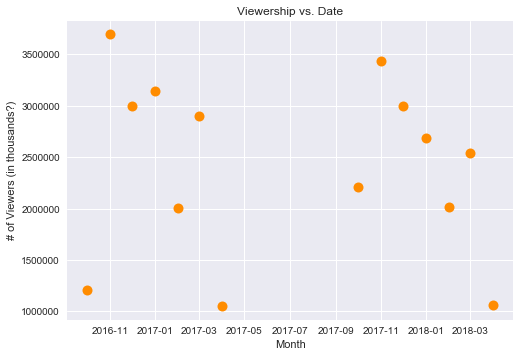

In [14]:
plt.plot(game_viewership,'o',color = 'darkorange',markersize=10)
plt.xlabel('Month')
plt.ylabel("# of Viewers (in thousands?)")
plt.title("Viewership vs. Date")

Feburary is the worst of regular season months for viewership, not including march.. ALso good to see that it appears the viewership improved from one year to the next. 

In [9]:
total_viewers = train_dat.groupby('Game_ID')['Rounded Viewers'].sum().reset_index()

In [10]:
feb_games = train_dat.loc[train_dat['Month']==2]
feb_games.drop(columns=['Country','Rounded Viewers'],inplace=True)

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
feb_games = feb_games.merge(total_viewers,on='Game_ID').drop_duplicates().reset_index(drop=True)

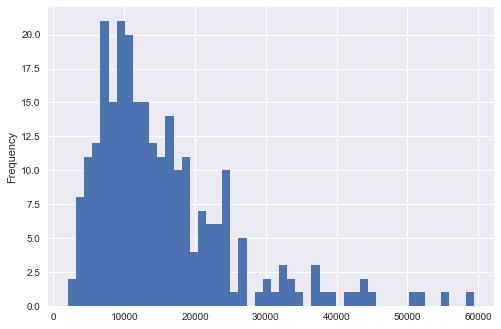

In [30]:
feb_games['Rounded Viewers'].plot(kind='hist',bins=50)

In [38]:
west = ['GSW', 'OKC', 'PHX', 'DEN', 'UTA',  'DAL', 
       'LAC',  'SAS', 'HOU', 'POR', 'SAC',  'MIN', 
       'NOP', 'MEM',
       'LAL']


east = [ 'ORL', 'BKN',  'BOS',
       'WAS', 'IND',  'ATL',
       'MIA', 'TOR', 'NYK', 'CHA', 'DET', 'MIL', 'PHI',
       'CHI', 'CLE']

In [46]:
def conference_game(z):
    west = ['GSW', 'OKC', 'PHX', 'DEN', 'UTA',  'DAL', 
           'LAC',  'SAS', 'HOU', 'POR', 'SAC',  'MIN', 
           'NOP', 'MEM',
           'LAL']


    east = [ 'ORL', 'BKN',  'BOS',
           'WAS', 'IND',  'ATL',
           'MIA', 'TOR', 'NYK', 'CHA', 'DET', 'MIL', 'PHI',
           'CHI', 'CLE']
    if z['Home_Team'] in east and z['Away_Team'] in east:
        return 1
    elif z['Home_Team'] in west and z['Away_Team'] in west:
        return 1
    else:
        return 0


In [47]:
feb_games['Conference Matchup?'] = feb_games.apply(lambda z : conference_game(z),axis=1)

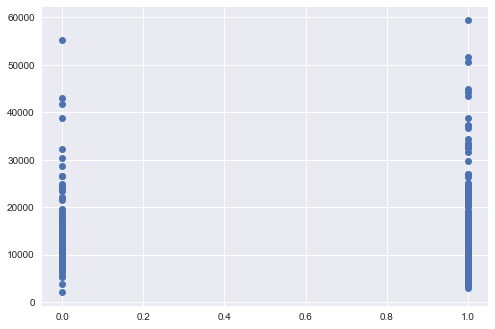

In [53]:
plt.plot(feb_games['Conference Matchup?'],feb_games['Rounded Viewers'],'o')

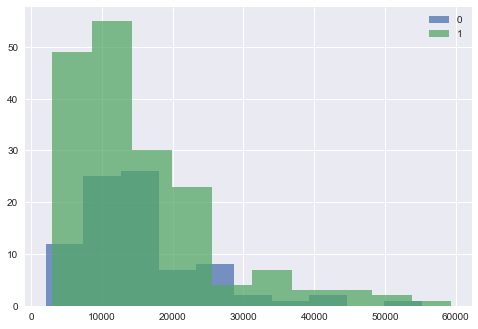

In [57]:

groups = feb_games.groupby('Conference Matchup?')['Rounded Viewers']

fig, ax = plt.subplots()

for k, v in groups:
    v.hist(label=k, alpha=.75, ax=ax)

ax.legend()

So it appears that during the month of feburary, this is when more of the inter conference matchups occur. Because of this, the NBA tournament will probably have to account for this, and thus be a heavily inter conference based matchup.

In [58]:
feb_games

,Season,Game_ID,Game_Date,Away_Team,Home_Team,Month,Year,Year_Month,Rounded Viewers,Conference Matchup?
0,2016-17,21600741,2/1/2017,CHA,GSW,2,2017,2017-02-01,30412,0
1,2016-17,21600740,2/1/2017,CHI,OKC,2,2017,2017-02-01,16797,0
2,2016-17,21600730,2/1/2017,IND,ORL,2,2017,2017-02-01,7858,1
3,2016-17,21600739,2/1/2017,LAC,PHX,2,2017,2017-02-01,9117,1
4,2016-17,21600737,2/1/2017,MEM,DEN,2,2017,2017-02-01,3954,1
5,2016-17,21600738,2/1/2017,MIL,UTA,2,2017,2017-02-01,6851,0
6,2016-17,21600733,2/1/2017,NYK,BKN,2,2017,2017-02-01,13195,1
7,2016-17,21600736,2/1/2017,PHI,DAL,2,2017,2017-02-01,9777,0
8,2016-17,21600732,2/1/2017,TOR,BOS,2,2017,2017-02-01,23424,1
9,2016-17,21600745,2/2/2017,GSW,LAC,2,2017,2017-02-01,36634,1


In [62]:
from bracket import bracket

SyntaxError: Missing parentheses in call to 'print' (bracket.py, line 50)

In [64]:
br = bracket